# Dataset

This data consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). It has four features from each sample: length and width of sepals and petals.

# Import Libraries

In [0]:
# to import and work with data
import pandas as pd 
# to visualize data and results
import seaborn as sns
import matplotlib.pyplot as plt 
# to pre-process model inputs
from sklearn import preprocessing 
# clustering algorithm
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load and Explore Dataset

In [0]:
from google.colab import files
uploaded = files.upload()
#import io
#df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
import io
# making data frame from csv file
#data = pd.read_csv("nba.csv", index_col ="Name")
iris=pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

Saving Iris.csv to Iris (1).csv


In [0]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [0]:
# select data
iris = iris[["PetalLengthCm", "PetalWidthCm"]]
print(iris)
# see if there's NA values
iris.isna().sum()

     PetalLengthCm  PetalWidthCm
0              1.4           0.2
1              1.4           0.2
2              1.3           0.2
3              1.5           0.2
4              1.4           0.2
..             ...           ...
145            5.2           2.3
146            5.0           1.9
147            5.2           2.0
148            5.4           2.3
149            5.1           1.8

[150 rows x 2 columns]


PetalLengthCm    0
PetalWidthCm     0
dtype: int64

# Prepare Model Inputs

After you have chosen the dataset, next up pre-processing/formatting input in a way that the model can use it. Two things happen in this phase: normalization of selected features (to reduce variability in the data) and converting the data frame into numpy arrays.

In [0]:
# data normalization
iris = preprocessing.scale(iris)
iris = pd.DataFrame(iris)
print(iris)
# input
import numpy as np
X = iris.iloc[:, [0,1]].values
print(X)

            0         1
0   -1.341272 -1.312977
1   -1.341272 -1.312977
2   -1.398138 -1.312977
3   -1.284407 -1.312977
4   -1.341272 -1.312977
..        ...       ...
145  0.819624  1.447956
146  0.705893  0.922064
147  0.819624  1.053537
148  0.933356  1.447956
149  0.762759  0.790591

[150 rows x 2 columns]
[[-1.34127240e+00 -1.31297673e+00]
 [-1.34127240e+00 -1.31297673e+00]
 [-1.39813811e+00 -1.31297673e+00]
 [-1.28440670e+00 -1.31297673e+00]
 [-1.34127240e+00 -1.31297673e+00]
 [-1.17067529e+00 -1.05003079e+00]
 [-1.34127240e+00 -1.18150376e+00]
 [-1.28440670e+00 -1.31297673e+00]
 [-1.34127240e+00 -1.31297673e+00]
 [-1.28440670e+00 -1.44444970e+00]
 [-1.28440670e+00 -1.31297673e+00]
 [-1.22754100e+00 -1.31297673e+00]
 [-1.34127240e+00 -1.44444970e+00]
 [-1.51186952e+00 -1.44444970e+00]
 [-1.45500381e+00 -1.31297673e+00]
 [-1.28440670e+00 -1.05003079e+00]
 [-1.39813811e+00 -1.05003079e+00]
 [-1.34127240e+00 -1.18150376e+00]
 [-1.17067529e+00 -1.18150376e+00]
 [-1.28440670e+00 -1.18

# Determine Number of Clusters

In K-means algorithm you need to define the number of clusters you want. The so-called “elbow method” can help determine that by minimizing the sum of squared errors.

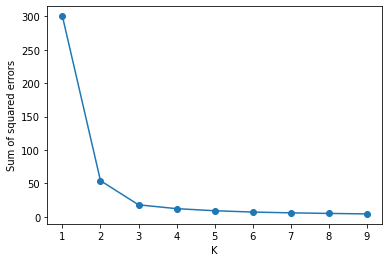

In [0]:
# The "elbow" method

k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(X)
    sse.append(km.inertia_)
plt.xlabel("K")
plt.ylabel("Sum of squared errors")
plt.plot(k_range, sse, marker='o')

# Model Implementation

Once you have made a determination on the only required parameter in the previous step, you are good to fit the model, visualize the number of clusters in a two-dimensional plot and do further analysis to answer the research question you are looking for.

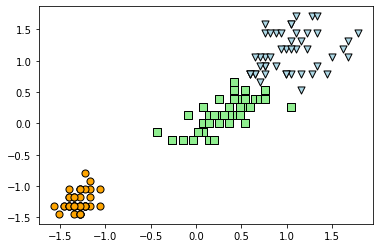

In [0]:
# model
km = KMeans(n_clusters = 3)
y_km=km.fit_predict(X)
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


In [0]:
# value counts in different clusters
frame = pd.DataFrame(X)
frame['cluster'] = y_km
frame['cluster'].value_counts()

0    52
1    50
2    48
Name: cluster, dtype: int64

Identify Centers 

In [0]:
centers = km.cluster_centers_
print(centers)

[[ 0.30564587  0.16609419]
 [-1.30487835 -1.25512862]
 [ 1.02813193  1.12749028]]


# Comparison of Actual vs Predicted Clusters

Text(0.5, 1.0, 'Predicted')

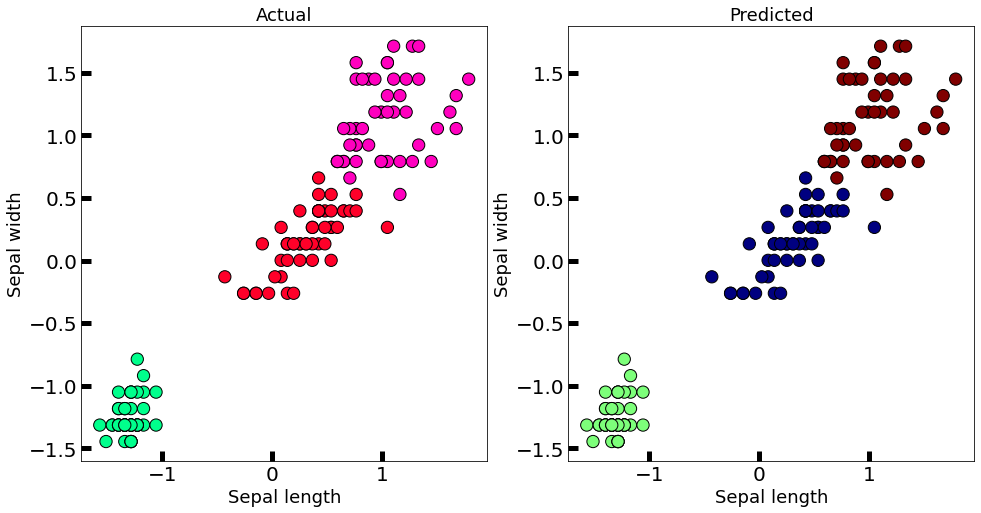

In [0]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y_km, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

# Reference

https://towardsdatascience.com/cluster-analysis-theory-and-implementation-of-unsupervised-algorithms-87823c4c5e03

https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee

https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187

